### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get Data

In [31]:
train = pd.read_hdf('../wip-data/train.h5')
train = train.iloc[:, 1:] # dropping the 'Id' Column

SalePrice = pd.read_hdf('../wip-data/SalePrice.h5')

### Investigating Heteroscedacity

To identify heteroscedacity of the dependent variable, <code>SalePrice</code>, we fit a linear model to the <i>train</i> dataset. We use the resulting model to predict values for the depended variable, <code>SalePrice_hat</code>, calculate the residuals and then plot the studentized residuals versus the values of <code>SalePrice_hat</code>. The shape of the resulting plots are a strong indicator of the presence of heteroscedacity.

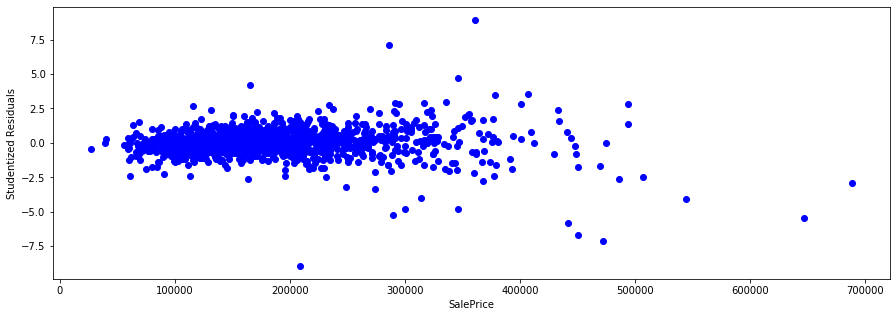

In [76]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(train, SalePrice)
SalePrice_hat = lm.predict(train)
res = (SalePrice_hat - SalePrice)/np.std(SalePrice_hat - SalePrice)

plt.figure(figsize = (15, 5))

plt.scatter(SalePrice_hat, res, color = 'blue')
plt.xlabel('SalePrice')
plt.ylabel('Studentized Residuals')

plt.show()

The plot shows that as the predicted value of the dependent variable, <code>SalePrice_hat</code>, increases so does the variance in the values of the studentized residuals. This is a strong indicator that the train dataset is heteroscedastic.

To eliminate this heteroscedacity, we transform the dependent variable to its log value, fit a linear model to this transformed dependent variable and then check if this transformation helps eliminate the heteroscedacity by plotting the values of the new studentized residuals to the values of the new dependent variable.

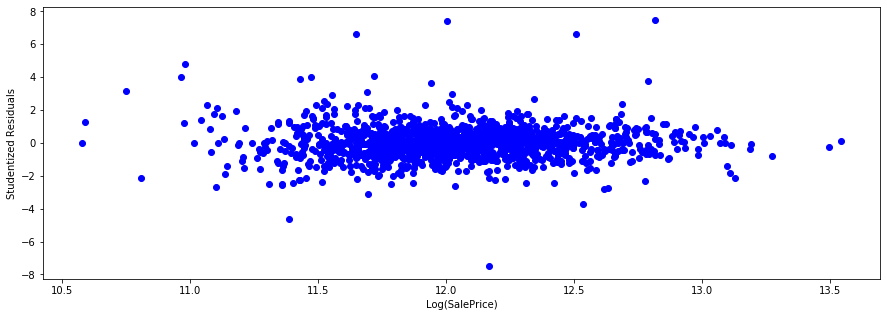

In [77]:
SP_log = np.log(SalePrice)

lm = LinearRegression().fit(train, SP_log)
SP_log_hat = lm.predict(train)
res = (SP_log_hat - SP_log)/np.std(SP_log_hat - SP_log)

plt.figure(figsize = (15, 5))

plt.scatter(SP_log_hat, res, color = 'blue')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Studentized Residuals')

plt.show()

The plot shows that variance in the values of the studentized residuals remains approximately the same (barring a few outliers) over the range of the predicted value of the dependent variable, <code>SP_log_hat</code>. This is a strong indicator we have eliminated heteroscedacity.

We conclude that to build robust linear model we shall use the transformed dependent variable

### Investigating <i>Bias - Variance</i> Tradeoff

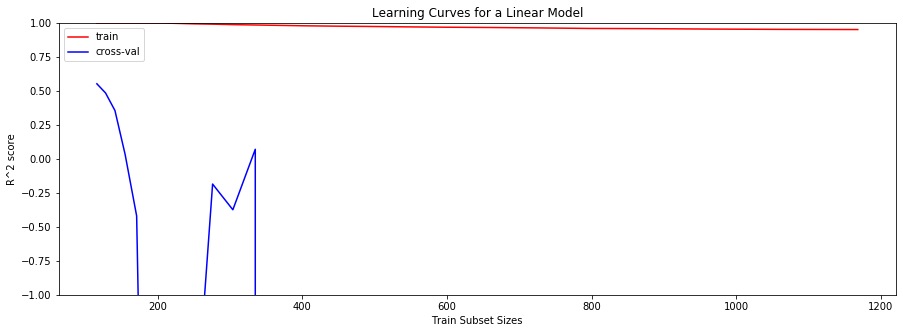

In [114]:
from sklearn.model_selection import train_test_split, learning_curve

train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), train, SP_log, 
                                                       train_sizes = np.logspace(-1, 0, 25), shuffle = True, 
                                                       random_state = 1970, 
                                                       scoring = 'r2')

plt.figure(figsize = (15, 5))

plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'red', label = 'train')
plt.plot(train_sizes, val_scores.mean(axis = 1), color = 'blue', label = 'cross-val')
plt.legend()
plt.xlabel('Train Subset Sizes')
plt.ylabel('R^2 score')
plt.ylim((-1, 1))
plt.title('Learning Curves for a Linear Model')

plt.show()

The learning curves are nowhere close to approaching each other and we can safely conclude that the results of a linear fit are likely to suffer from a variance problem rather than a bias problem. A regularized linear model is therefore likely to deliver good results.